In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings('ignore')

In [55]:
data = pd.read_csv('dataset.csv')

In [56]:
data.head()

,Age,Income,Expense
0,25,28425,20000
1,26,22170,20000
2,27,40857,35000
3,28,25486,20000
4,29,34805,30000


In [57]:
data.tail()

,Age,Income,Expense
12,21,25730,20000
13,34,25818,21000
14,56,20778,23000
15,32,47165,40000
16,34,22903,15000


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Age      17 non-null     int64
 1   Income   17 non-null     int64
 2   Expense  17 non-null     int64
dtypes: int64(3)
memory usage: 540.0 bytes


In [59]:
data.describe

<bound method NDFrame.describe of     Age  Income  Expense
0    25   28425    20000
1    26   22170    20000
2    27   40857    35000
3    28   25486    20000
4    29   34805    30000
5    23   33410    25000
6    32   34943    30000
7   109   38608    12000
8   225   40286    12000
9    34   44140    21000
10   56   29158    12000
11   78   42098    13000
12   21   25730    20000
13   34   25818    21000
14   56   20778    23000
15   32   47165    40000
16   34   22903    15000>

In [60]:
print(f'Dataset has {data.shape[0]} rows and {data.shape[1]} columns')

Dataset has 17 rows and 3 columns


In [61]:
data.isna().sum()

Age        0
Income     0
Expense    0
dtype: int64

In [62]:
data.isnull().sum()

Age        0
Income     0
Expense    0
dtype: int64

In [63]:
data.dropna(axis=1, inplace=True)
data.isna().sum()

Age        0
Income     0
Expense    0
dtype: int64

In [64]:
data.isnull().sum()

Age        0
Income     0
Expense    0
dtype: int64

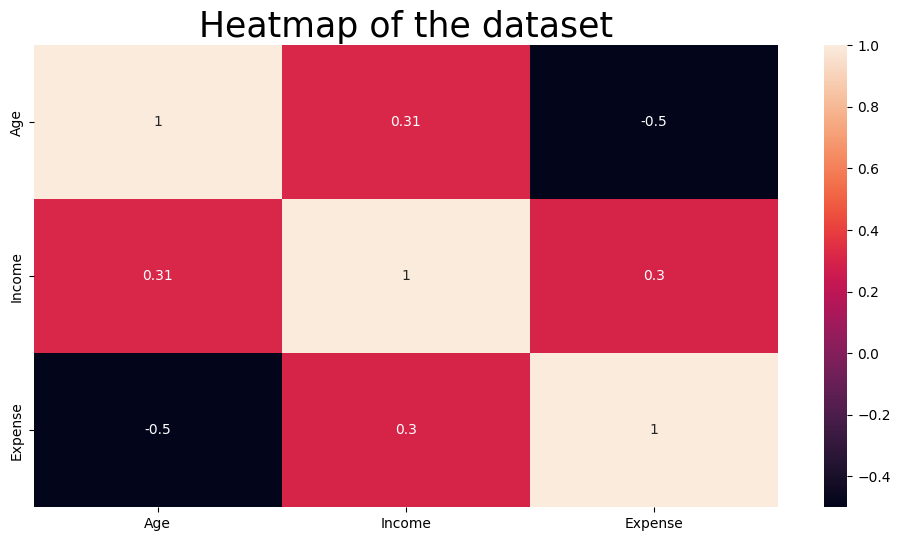

In [65]:
plt.figure(figsize=(12,6))
sns.heatmap(data.corr(numeric_only=True), annot=True)
plt.title('Heatmap of the dataset', size=25)
plt.show()

In [68]:
features = ['Income', 'Age']
x = data[features]
y = data['Expense']

In [69]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [70]:
y_pred = model.predict(x_test)

In [71]:
model.intercept_

11045.959330341731

In [72]:
model.coef_

array([   0.66015736, -238.62658512])

In [73]:
#Mean Absolute Error
print("Mean Absolute Error:- ", metrics.mean_absolute_error(y_test, y_pred))

#Mean Squared Error
print("Mean Squared Error:- ", metrics.mean_squared_error(y_test, y_pred))

#Root Mean Squared Error
print("Root Mean Squared Error:- ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

#R2 Score
print("R2 Score:- ", metrics.r2_score(y_test, y_pred))

Mean Absolute Error:-  10791.695005704974
Mean Squared Error:-  230516630.5369061
Root Mean Squared Error:-  15182.774138374913
R2 Score:-  -4.665539306590626


In [74]:
results = cross_val_score(model, x, y, cv=KFold(3))
print(results)
print()
print(np.mean(results))

[  0.38071318 -24.86167365   0.40777039]

-8.02439669424817
